In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [198]:
inp0= pd.read_csv(r"C:\Users\Rohit Thanvi\Desktop\day.csv")

In [199]:
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [200]:
inp0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [201]:
inp0.shape

(730, 16)

In [202]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [203]:
dup = inp0.copy()

dup.drop_duplicates(subset=None, inplace=True)

In [204]:
print(dup.shape)
print(inp0.shape)

(730, 16)
(730, 16)


In [205]:
inp0.drop(['instant'],axis=1,inplace=True)
inp0.drop(['dteday'],axis=1,inplace=True)
inp0.drop(['casual'],axis=1,inplace=True)
inp0.drop(['registered'],axis=1,inplace=True)

In [206]:
inp0.shape

(730, 12)

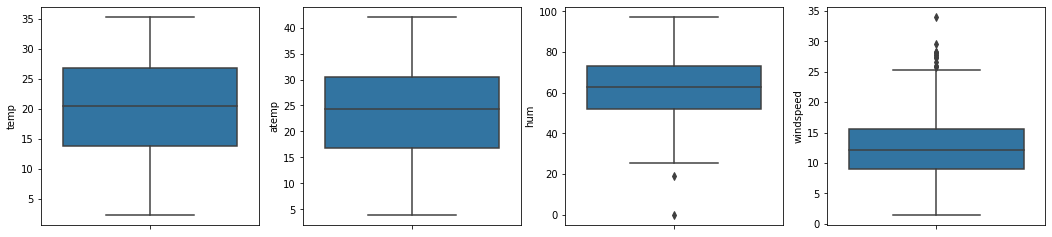

In [207]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=inp0)
    i= i+1

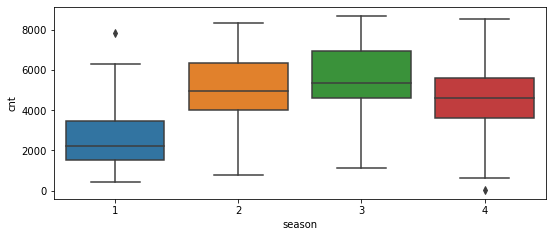

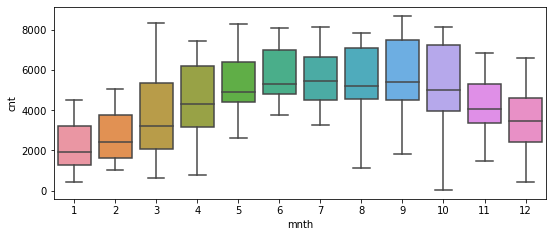

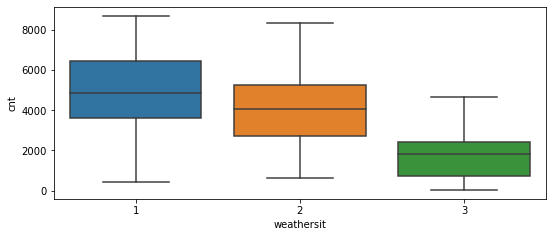

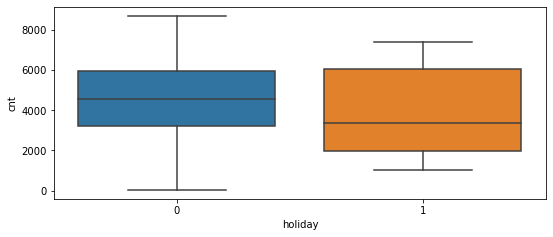

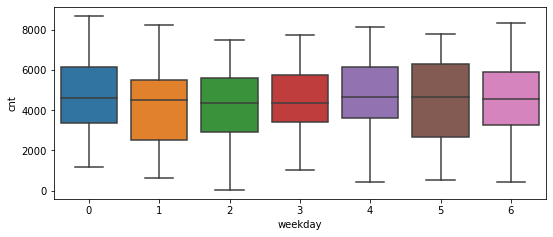

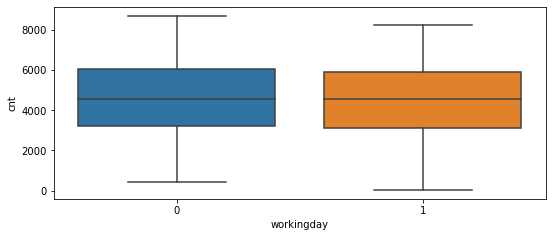

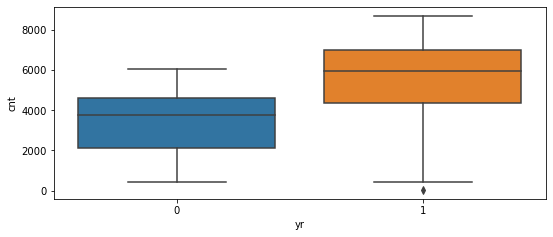

In [208]:
colns= ['season','mnth','weathersit' ,'holiday','weekday','workingday','yr']
for i in colns:
    plt.figure(figsize=(30, 12))
    plt.subplot(3,3,1)
    sns.boxplot(x = i, y = 'cnt', data = inp0)
    plt.show()

<Figure size 1080x2160 with 0 Axes>

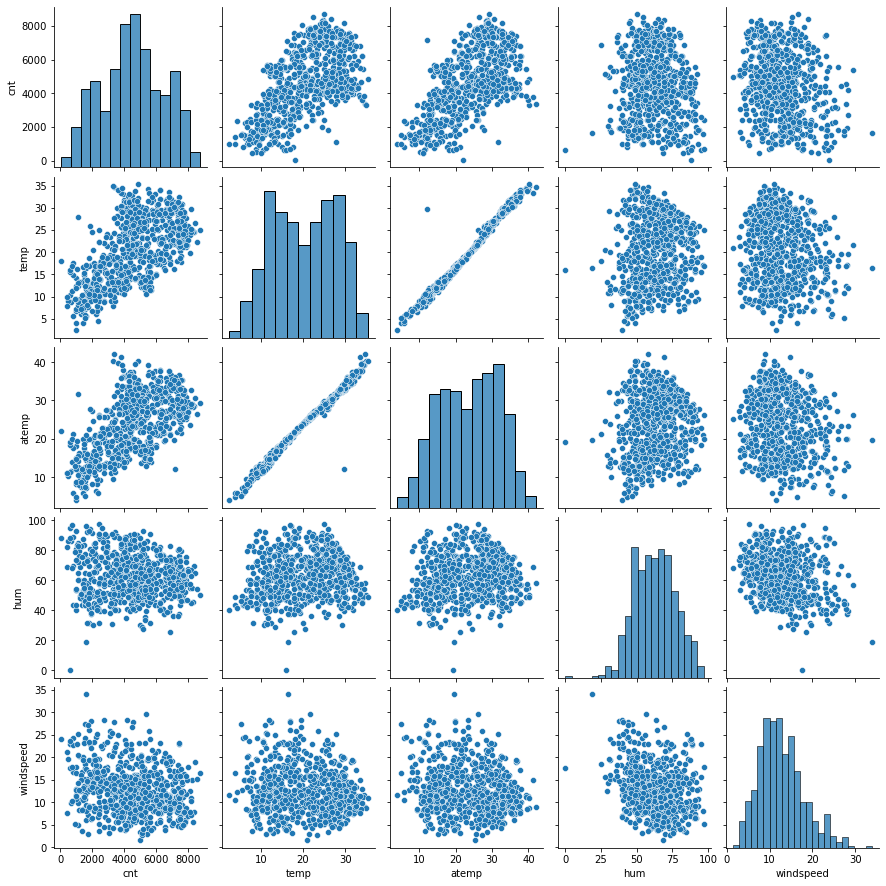

In [209]:
plt.figure(figsize = (15,30))
sns.pairplot(data=inp0,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

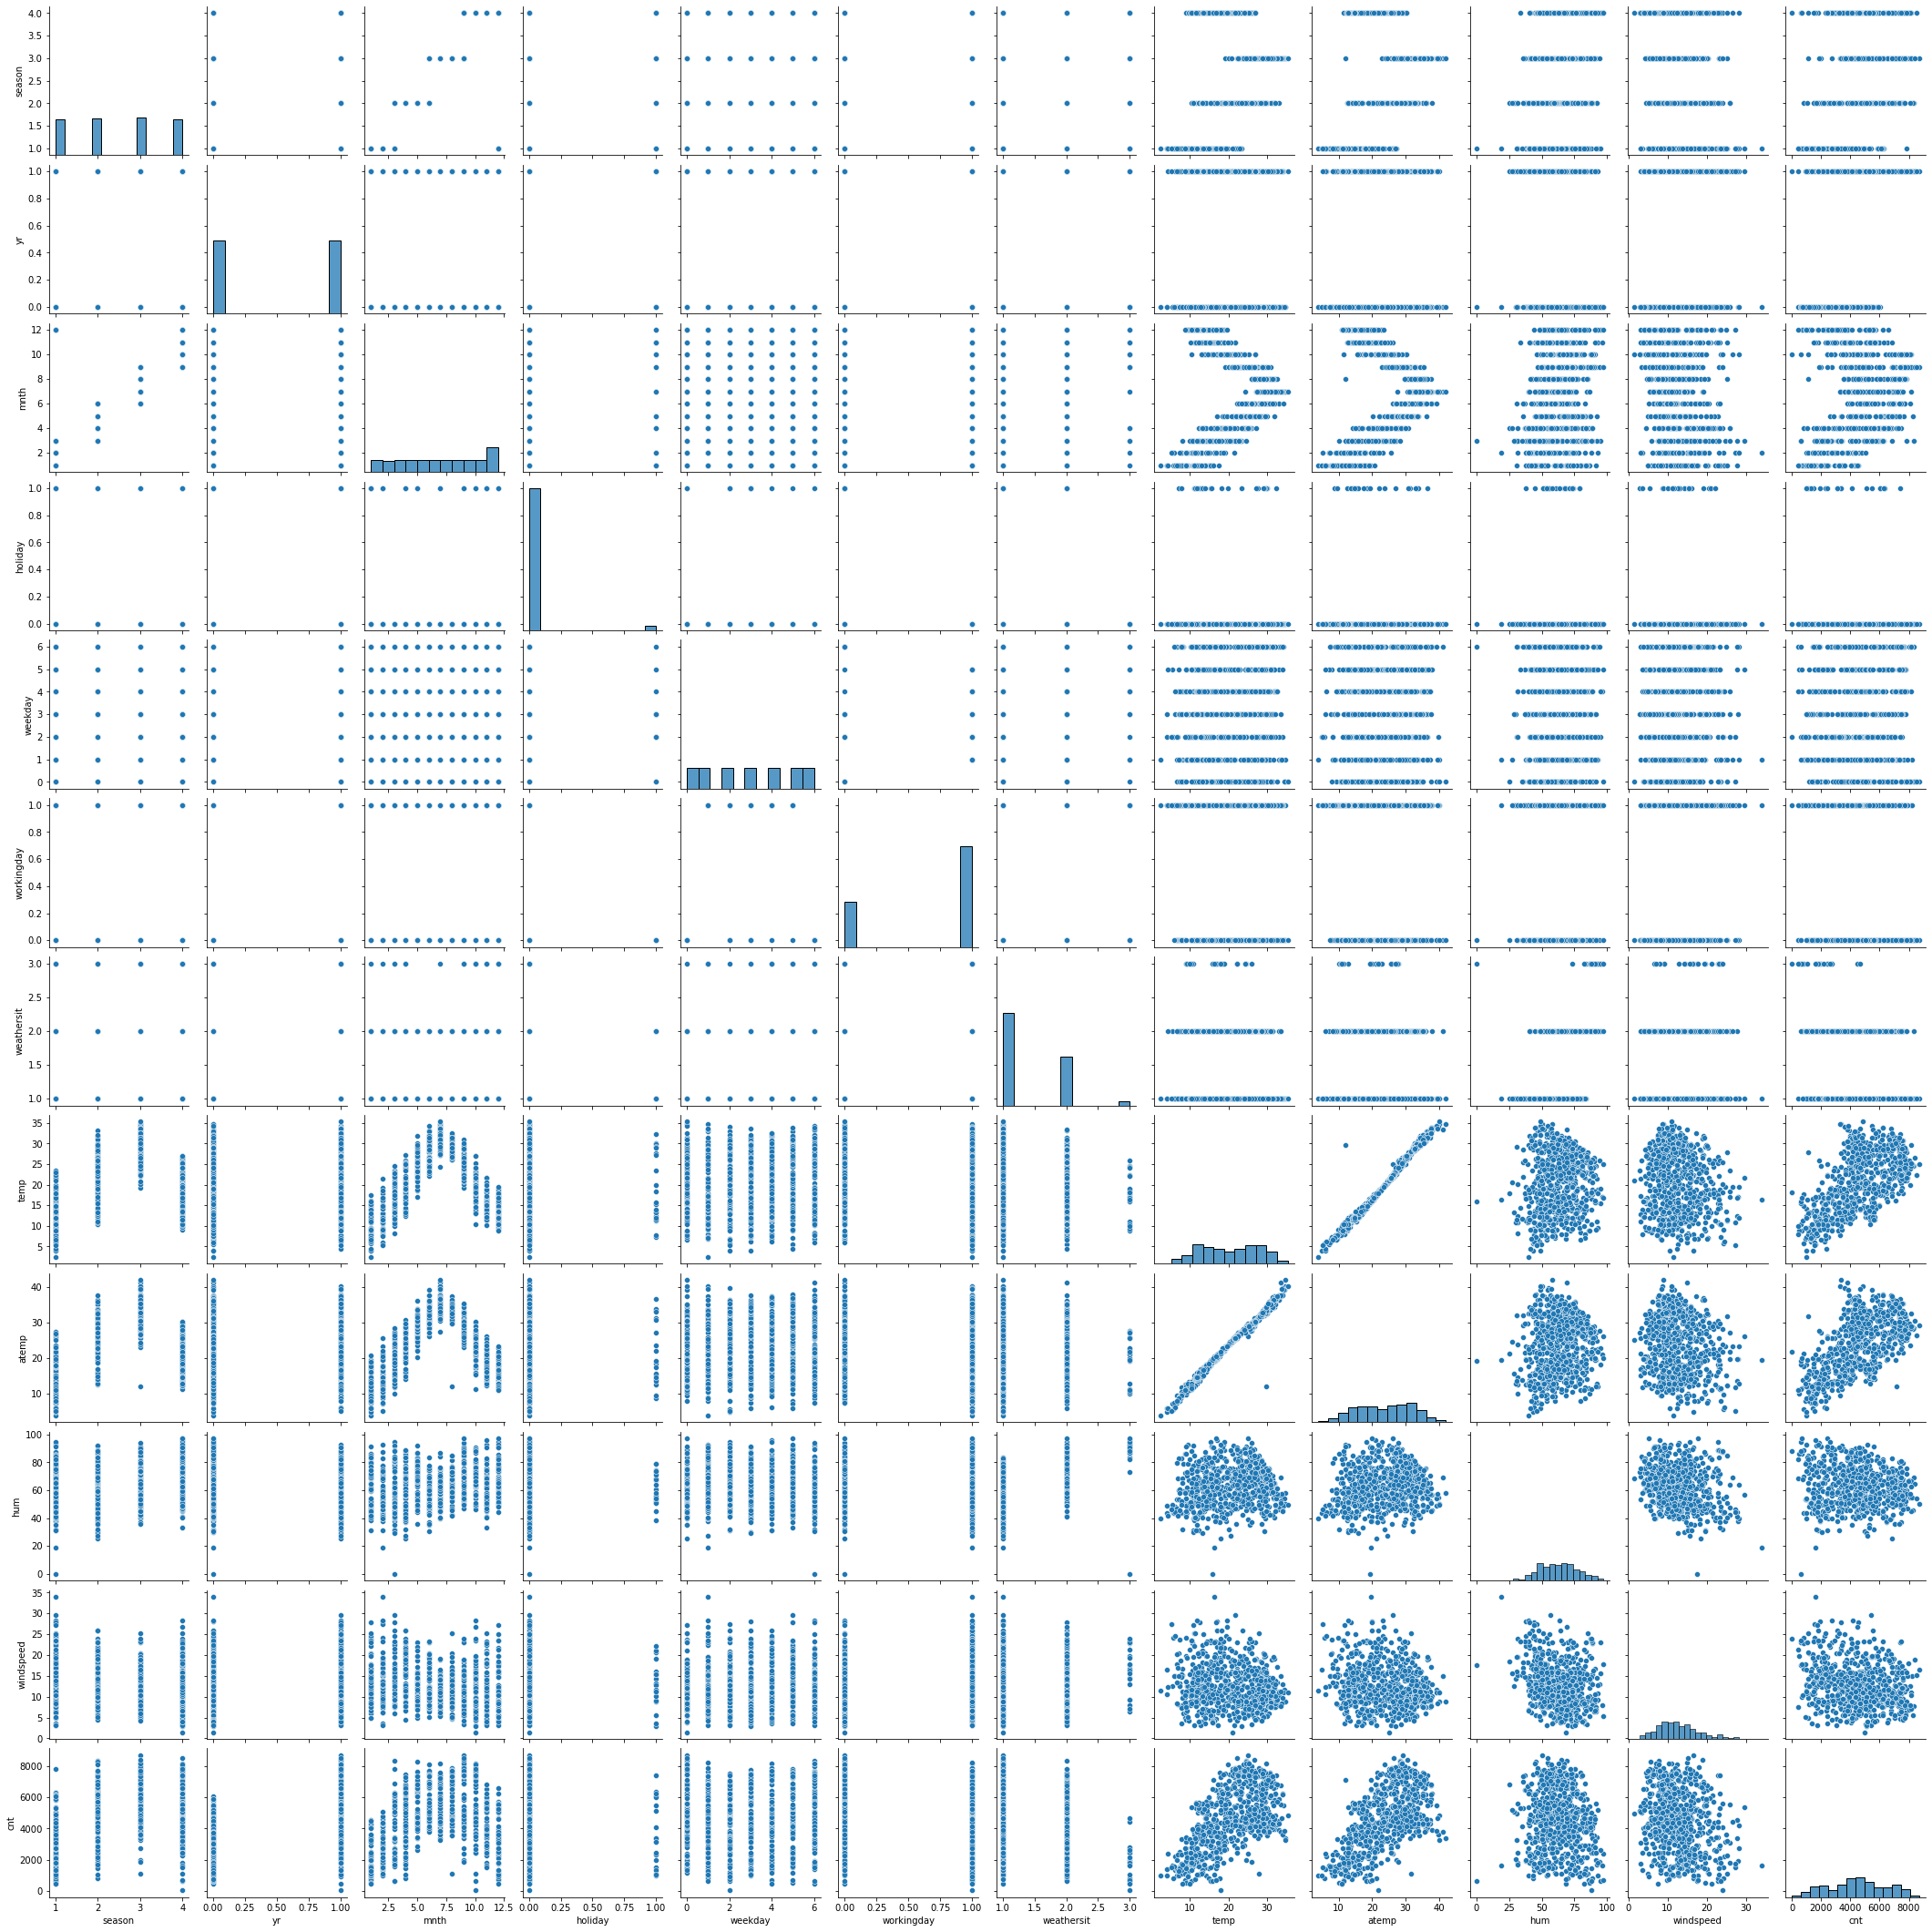

In [210]:
sns.pairplot(inp0)

<AxesSubplot:>

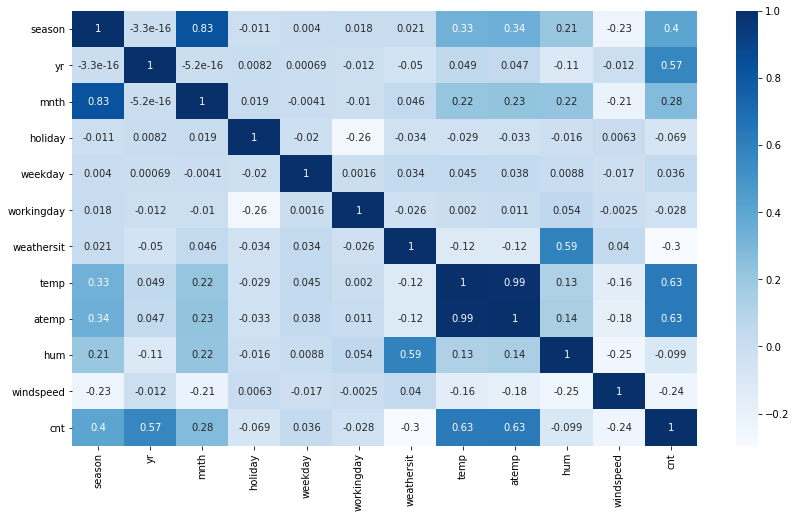

In [211]:
plt.figure(figsize = (14, 8))
sns.heatmap(inp0.corr(), annot = True, cmap="Blues")

In [212]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [213]:
inp0['season']=inp0['season'].astype('category')
inp0['weathersit']=inp0['weathersit'].astype('category')
inp0['mnth']=inp0['mnth'].astype('category')
inp0['weekday']=inp0['weekday'].astype('category')

In [214]:
inp0 = pd.get_dummies(inp0, drop_first=True)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [215]:
inp0.shape

(730, 30)

In [216]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp0,train_size=0.7,test_size=0.3,random_state=1000)

In [217]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [218]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [219]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

In [220]:
scaler = MinMaxScaler()

In [221]:
numerical=['atemp', 'hum','temp','windspeed','cnt']

df_train[numerical]=scaler.fit_transform(df_train[numerical])

In [222]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,...,0,0,0,0,0,0,0,1,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,...,1,0,0,0,1,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,...,0,0,0,1,0,0,0,0,1,0
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,...,0,0,0,1,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,...,0,0,0,0,0,0,1,0,1,0


In [223]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,...,0.076471,0.080392,0.143137,0.145098,0.141176,0.131373,0.143137,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,...,0.266010,0.272166,0.350557,0.352545,0.348545,0.338139,0.350557,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
y_train = df_train.pop('cnt')
X_train = df_train

In [225]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [226]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [227]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 7),
 ('mnth_5', False, 5),
 ('mnth_6', False, 8),
 ('mnth_7', False, 15),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 13),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [228]:
cols=X_train.columns[rfe.support_]

In [229]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [230]:
cols

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [231]:
X_train_rfe = X_train[cols]

In [232]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [234]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,18.32
3,hum,11.33
9,weekday_1,8.78
13,weekday_5,8.57
10,weekday_2,8.50
12,weekday_4,8.16
11,weekday_3,7.16
6,season_3,6.64
4,windspeed,4.26


In [235]:
import statsmodels.api as sm  
X_train_constant = sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_constant).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.15e-175
Time:                        23:01:09   Log-Likelihood:                 492.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     494   BIC:                            -886.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2999      0.028     10.810   

In [236]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [237]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,14.59
8,weekday_1,8.69
12,weekday_5,8.49
9,weekday_2,8.39
11,weekday_4,8.10
10,weekday_3,7.09
5,season_3,6.46
4,season_2,3.71
3,windspeed,3.66


In [271]:
X_train_constant2= sm.add_constant(X_train_rfe2)
lr2=sm.OLS(y_train,X_train_constant2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          7.24e-162
Time:                        23:05:38   Log-Likelihood:                 457.28
No. Observations:                 510   AIC:                            -884.6
Df Residuals:                     495   BIC:                            -821.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1194      0.019      6.143   

In [239]:
X_train_rfe3 = X_train_rfe2.drop(["season_3"], axis = 1)

In [240]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.83
7,weekday_1,8.61
11,weekday_5,8.42
8,weekday_2,8.34
10,weekday_4,8.02
9,weekday_3,7.04
2,temp,4.02
3,windspeed,3.50
0,yr,1.88
4,season_2,1.60


In [272]:
X_train_constant3 = sm.add_constant(X_train_rfe3)
lr3=sm.OLS(y_train,X_train_constant3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.05e-160
Time:                        23:06:10   Log-Likelihood:                 451.90
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.019      5.686   

In [242]:
X_train_rfe4 = X_train_rfe3.drop(["workingday"], axis = 1)

In [243]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.02
2,windspeed,3.50
0,yr,1.88
3,season_2,1.60
8,weekday_3,1.40
10,weekday_5,1.40
6,weekday_1,1.39
7,weekday_2,1.38
9,weekday_4,1.37
4,season_4,1.35


In [273]:
X_train_constant4 = sm.add_constant(X_train_rfe4)
lr4=sm.OLS(y_train,X_train_constant4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     156.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.06e-160
Time:                        23:06:20   Log-Likelihood:                 447.64
No. Observations:                 510   AIC:                            -869.3
Df Residuals:                     497   BIC:                            -814.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1078      0.020      5.516   

In [245]:
X_train_rfe5 = X_train_rfe4.drop(["weekday_1"], axis = 1)

In [246]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.35
0,yr,1.87
3,season_2,1.60
4,season_4,1.34
7,weekday_3,1.29
9,weekday_5,1.29
6,weekday_2,1.28
8,weekday_4,1.27
5,mnth_9,1.17


In [274]:
X_train_constant5 = sm.add_constant(X_train_rfe5)
lr5=sm.OLS(y_train,X_train_constant5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          6.33e-161
Time:                        23:06:31   Log-Likelihood:                 447.11
No. Observations:                 510   AIC:                            -870.2
Df Residuals:                     498   BIC:                            -819.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1026      0.019      5.440   

In [248]:
X_train_rfe6 = X_train_rfe5.drop(["weekday_4"], axis = 1)

In [249]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.70
2,windspeed,3.31
0,yr,1.87
3,season_2,1.60
4,season_4,1.33
7,weekday_3,1.23
8,weekday_5,1.23
6,weekday_2,1.22
5,mnth_9,1.17
9,weathersit_3,1.06


In [275]:
X_train_constant6 = sm.add_constant(X_train_rfe6)
lr6=sm.OLS(y_train,X_train_constant6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          4.52e-162
Time:                        23:06:43   Log-Likelihood:                 447.10
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     499   BIC:                            -825.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1023      0.019      5.513   

In [251]:
X_train_rfe7 = X_train_rfe6.drop(["weekday_5"], axis = 1)

In [252]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.62
2,windspeed,3.28
0,yr,1.87
3,season_2,1.59
4,season_4,1.31
7,weekday_3,1.19
6,weekday_2,1.18
5,mnth_9,1.17
8,weathersit_3,1.06


In [276]:
X_train_constant7 = sm.add_constant(X_train_rfe7)
lr7=sm.OLS(y_train,X_train_constant7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          3.08e-163
Time:                        23:06:58   Log-Likelihood:                 447.09
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     500   BIC:                            -831.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1028      0.018      5.610   

In [254]:
X_train_rfe8 = X_train_rfe7.drop(["weekday_3"], axis = 1)

In [255]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.57
2,windspeed,3.24
0,yr,1.87
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.17
6,weekday_2,1.16
7,weathersit_3,1.06


In [277]:
X_train_constant8 = sm.add_constant(X_train_rfe8)
lr8=sm.OLS(y_train,X_train_constant8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          2.20e-163
Time:                        23:07:07   Log-Likelihood:                 444.61
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     501   BIC:                            -833.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0989      0.018      5.404   

In [257]:
X_train_rfe9 = X_train_rfe8.drop(["weekday_2"], axis = 1)

In [258]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe9.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.55
2,windspeed,3.17
0,yr,1.86
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weathersit_3,1.06


In [278]:
X_train_constant9 = sm.add_constant(X_train_rfe9)
lr9=sm.OLS(y_train,X_train_constant9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     263.6
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.24e-163
Time:                        23:07:19   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     502   BIC:                            -834.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.018      5.145   

In [280]:
y_train_predict= lr9.predict(X_train_constant9)

In [282]:
y= y_train- y_train_predict

<AxesSubplot:ylabel='Density'>

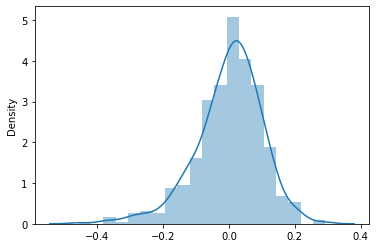

In [283]:
sns.distplot((y), bins = 20)

In [284]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [285]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.707763,0.412258,0.243731,1.847594,0.344287,0.519768,0.219178,0.273973,...,0.095890,0.095890,0.146119,0.136986,0.146119,0.168950,0.141553,0.127854,0.315068,0.031963
std,0.501140,0.188034,0.455833,0.203098,0.084487,0.463782,0.157137,0.229815,0.414637,0.447017,...,0.295115,0.295115,0.354034,0.344621,0.354034,0.375566,0.349389,0.334692,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.067855,0.040740,0.684050,0.047450,0.069604,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.236531,0.169462,1.487787,0.230151,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.425768,0.253718,1.797073,0.320521,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.583696,0.312116,2.159007,0.433733,0.699896,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.805164,0.414403,2.973853,0.864144,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [290]:
col_train=X_train_rfe9.columns
X_test=X_test[col_train]


In [294]:
X_test_constant9 = sm.add_constant(X_test)
X_test_constant9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [295]:
y_predict = lr9.predict(X_test_constant9)

Text(0, 0.5, 'y_pred')

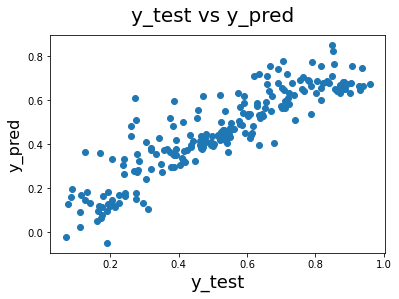

In [296]:
fig = plt.figure()
plt.scatter(y_test, y_predict)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [297]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_predict)
r2

0.7193291218131406

so the final equation:-
cnt = 0.0936 + (yr × 0.2266) + (temp × 0.5596) − (windspeed × 0.1044) + (season_2 × 0.0757) + (season_4 × 0.1386) + 
(mnth_9 × 0.0873) - (weathersit_3 × 0.2678)